In [64]:
import pandas as pd
import matplotlib.pyplot as plt
concatenate_dfs = [] 
backgrounds = ['at dusk', 'at night', 'in bright sunlight', 'in the fog', 'in the forest', 'in the rain', 'in the snow', 'studio lighting']
for bg in backgrounds:
    bg_file = '_'.join(bg.split())
    df = pd.read_csv(f'./cache/{bg_file}_preds.csv')
    temp_df = pd.DataFrame({'cnf':df['cnf'],'bg':bg, 'z':df['true_y']})
    concatenate_dfs.append(temp_df)
main_df = pd.concat(concatenate_dfs, ignore_index=True)
# Group by columns 'z' and calculate the mean of 'cnf'
df_group = main_df.groupby(['z'])['cnf'].mean().reset_index()
# Sort the grouped DataFrame by mean cnf in descending order (images with max confidence)
sorted_df = df_group.sort_values(by='cnf', ascending=False)
best_cnf_z = list(sorted_df.head(20)['z'])
df_group = main_df.groupby(['z'])['cnf'].std().reset_index()
# Sort the grouped DataFrame by standard deviation in ascending order
sorted_df = df_group.sort_values(by='cnf', ascending=True)
# Get the top k z with the minimum standard deviation
top_z_min_std = sorted_df.head(20)
best_std_z = list(top_z_min_std['z'])
best_z = [z for z in best_cnf_z if z in best_std_z]
filtered_df = main_df[main_df['z'].isin(best_z)]
# Group by columns 'z' and 'bg' and calculate the standard deviation of 'cnf'
df_group = filtered_df.groupby(['z','bg'])['cnf'].std().reset_index()
# Sort the grouped DataFrame by standard deviation in ascending order
sorted_df = df_group.sort_values(by='cnf', ascending=True)
# Drop duplicates based on the 'z' column to keep only distinct 'z' values
distinct_z_df = sorted_df.drop_duplicates(subset='z', keep='first')
# Select the top 20 rows with distinct 'z' values
top_z_beta_distinct_z = distinct_z_df.head(10)
# Print the result
print(top_z_beta_distinct_z)


      z                  bg       cnf
2    84  in bright sunlight  0.000000
86  340         in the snow  0.000264
72  327             at dusk  0.000329
56  296             at dusk  0.001451
25  105            at night  0.001534
12   94       in the forest  0.001673
50  251  in bright sunlight  0.002305
65  323            at night  0.002665
37  130         in the rain  0.002935
98  388  in bright sunlight  0.003045


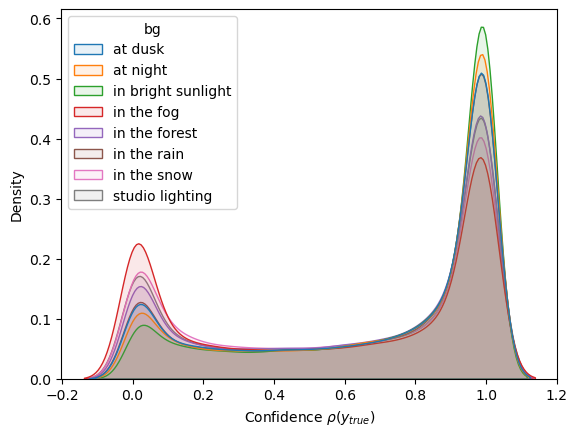

In [43]:
import seaborn as sns

ax = sns.kdeplot(data=main_df, x='cnf', hue='bg', alpha = 0.1, fill = True)
sns.move_legend(ax, 'upper left')
ax.set(xlabel = 'Confidence '+r'$\rho(y_{true})$')
plt.show()

bg
at dusk               0.356239
at night              0.347317
in bright sunlight    0.332188
in the fog            0.399666
in the forest         0.371086
in the rain           0.358233
in the snow           0.383387
studio lighting       0.381581
Name: cnf, dtype: float64


/tmp/ipykernel_2703288/658395400.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


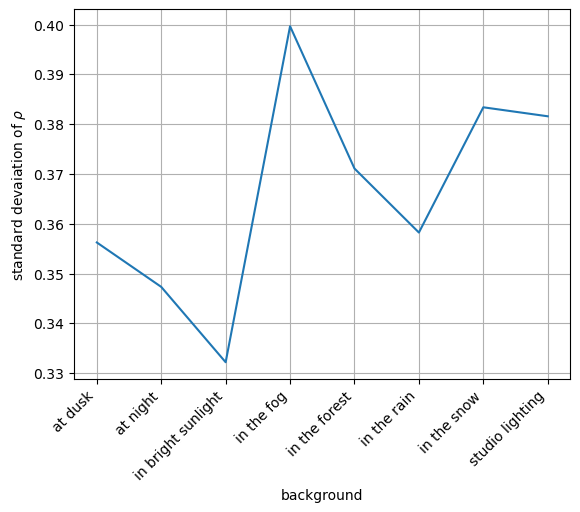

In [45]:
variances_df = main_df.groupby('bg')['cnf'].std()
print(variances_df)
ax = sns.lineplot(data=variances_df)
ax.set(ylabel = 'standard devaiation of '+r'$\rho$', xlabel='background')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.grid()
plt.show()